In [7]:
# check_mat

%matplotlib inline
from scipy.io import loadmat
from logging import getLogger, StreamHandler, DEBUG
import matplotlib.pyplot as plt
import numpy as np
import cv2
import _pickle
import os

logger = getLogger(__name__)
handler = StreamHandler()
handler.setLevel(DEBUG)
logger.setLevel(DEBUG)
logger.addHandler(handler)
logger.propagate = False

cifer_path = './cifar-100-python'

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = _pickle.load(fo, encoding='bytes')
    return dict

def openCifarImageFile(file_path):
    data_dict = unpickle(file_path)
    train_data = data_dict[b'data']
    train_fine_labels = data_dict[b'fine_labels']
    train_coarse_labels = data_dict[b'coarse_labels']
    return train_data, train_fine_labels, train_coarse_labels

def getCifarImageData(train_data):
    np_data = np.array(train_data)
    np_data = np.rollaxis(np_data.reshape((3,32,32)),0,3)
    return np_data


In [8]:
train_path = os.path.join(cifer_path, 'train')
test_path = os.path.join(cifer_path, 'test')

train_data ,train_fine_labels ,train_coarse_labels = openCifarImageFile(train_path)
test_data ,test_fine_labels ,test_coarse_labels = openCifarImageFile(train_path)

meta_dic = unpickle(os.path.join(cifer_path, 'meta'))
clabel_names = meta_dic[b'coarse_label_names']
flabel_names = meta_dic[b'fine_label_names']



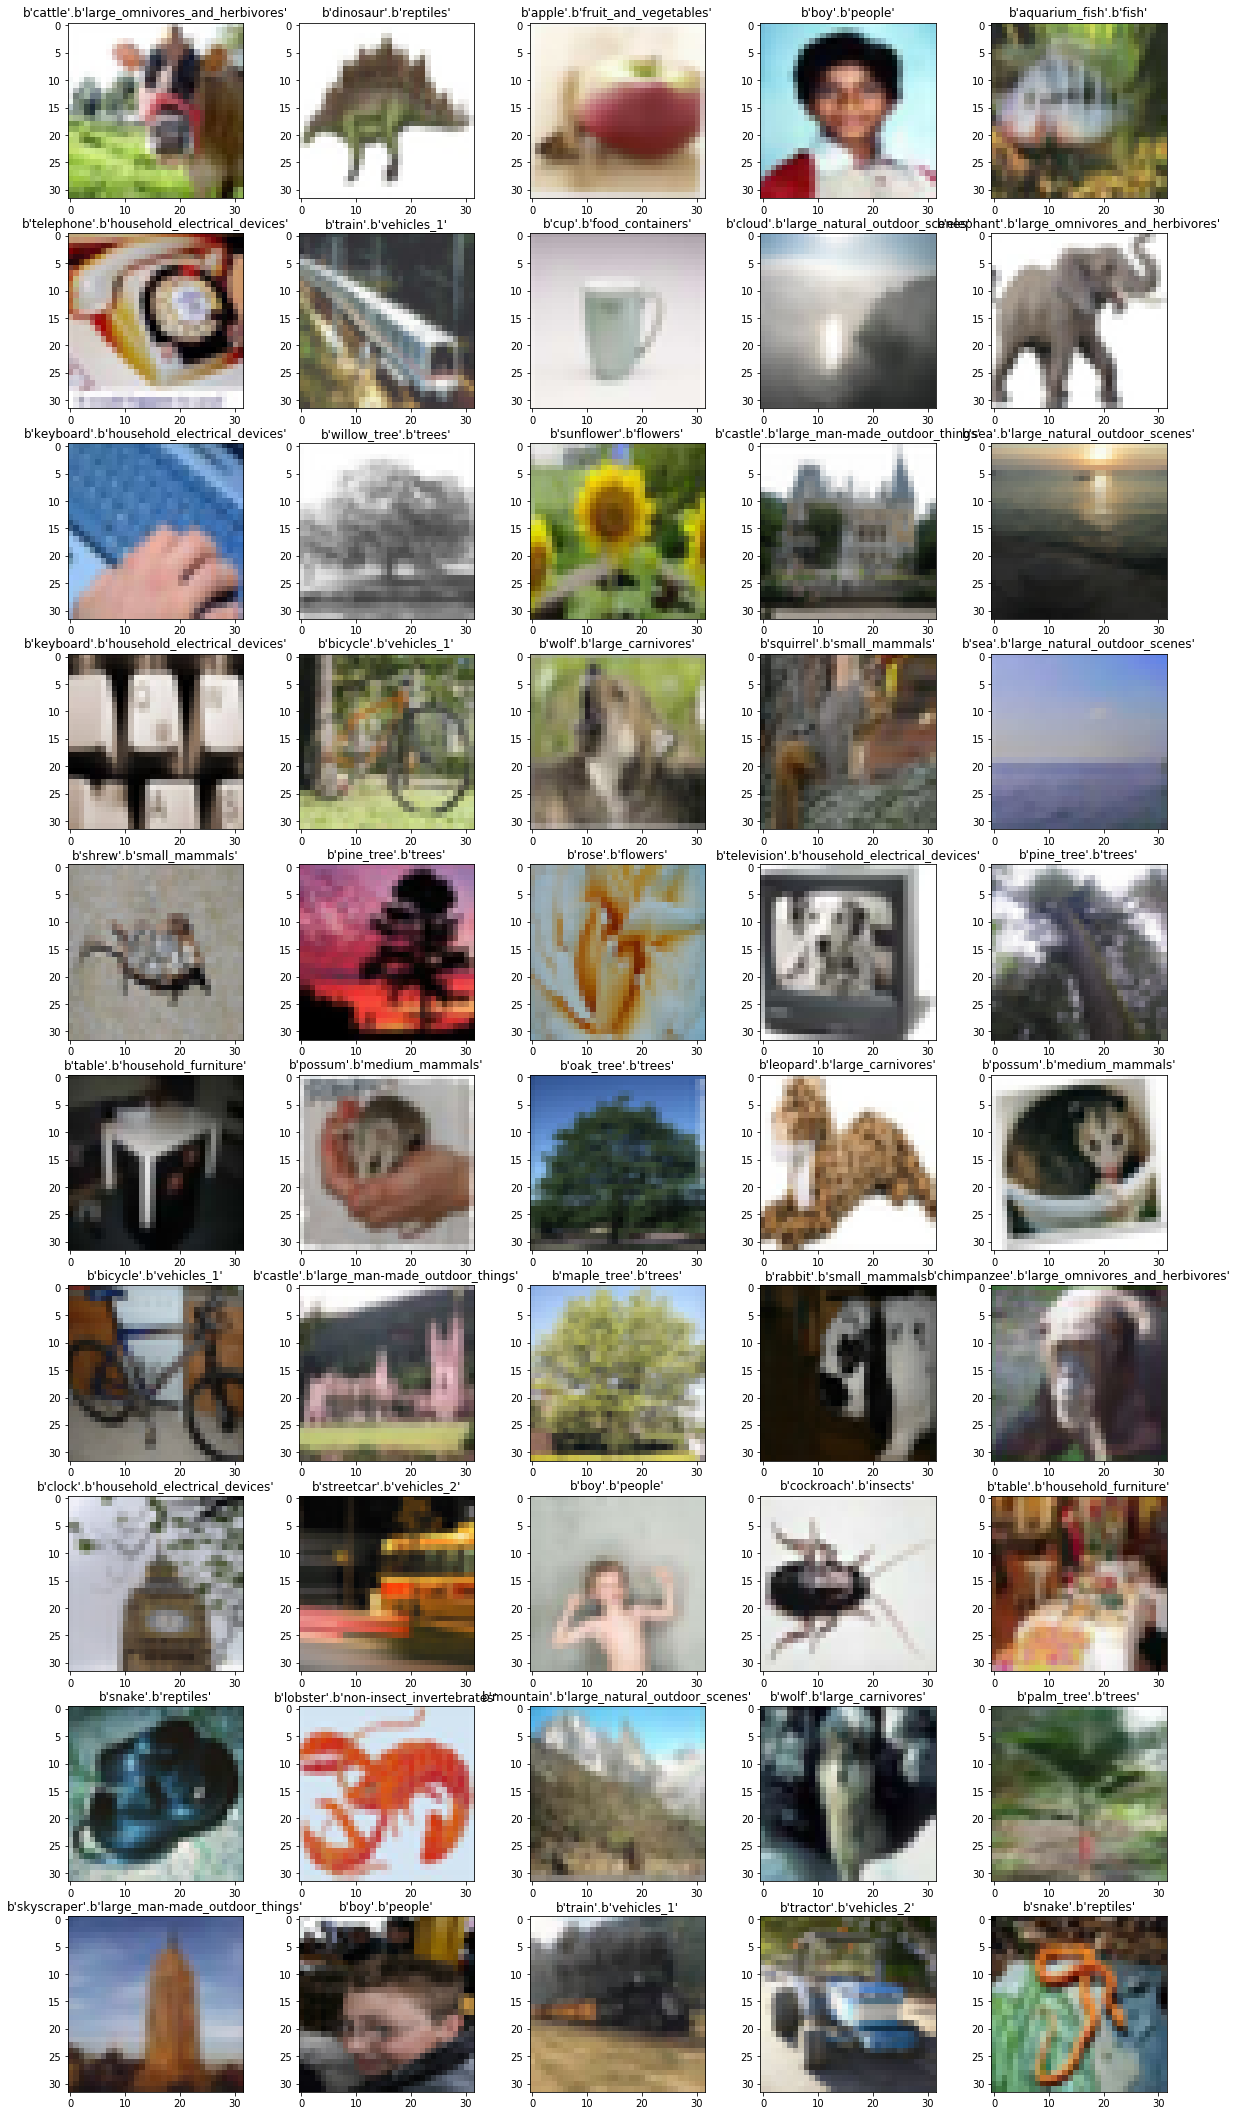

In [9]:
# displaying all image data is slow because image data is large. recomend to limit
roop_count = 50
#roopCount = len(imdb_wiki_marge["age"][0])


fig = plt.figure(figsize=(20, roop_count*2))
for i in range(roop_count):
    fig.add_subplot(roop_count/2+1,5,i+1)
    np_data = getCifarImageData(train_data[i])
    fine_label = flabel_names[train_fine_labels[i]]
    coarse_label = clabel_names[train_coarse_labels[i]]
    plt.imshow(np_data)
    plt.title("%s.%s" % (fine_label, coarse_label))
